In [7]:
# 🧪 Principal Component Analysis (PCA) Example: Visualizing High-Dimensional Data

# --------------------------------------------
# Step 1: Import necessary libraries
# --------------------------------------------

import numpy as np  # 🔢 Core numerical library, used for array math, dot products, etc.
import pandas as pd  # 📊 Helpful for manipulating datasets (not required here, but often useful)
import matplotlib.pyplot as plt  # 🖼️ Plotting library for 2D visualization
from sklearn.datasets import load_iris  # 🌸 Built-in toy dataset with labeled flower data
from pca import PrincipalComponentAnalysis  # 🧠 Custom PCA class (wrapper for learning/demo)

In [8]:
# --------------------------------------------
# Step 2: Load a dataset
# --------------------------------------------

# 🌸 Iris dataset is a classic ML dataset
# Contains 150 samples (flowers), each with 4 features:
#  - sepal length, sepal width, petal length, petal width
# 3 flower species = 3 classes (Setosa, Versicolor, Virginica)
data = load_iris()

# X = 2D array of shape (150, 4)
# Each row = 1 flower, Each column = 1 feature (numerical)
X = data.data        

# y = class labels (integers: 0, 1, 2)
# This is what we use for color-coding in the plot
y = data.target      

# Feature and class labels (for human-readable legends/axes)
feature_names = data.feature_names
target_names = data.target_names

# Output shape of original dataset
# Helps verify how many samples and features we have before PCA
print(f"📐 Original Data Shape: {X.shape}")  # (150, 4)

📐 Original Data Shape: (150, 4)


In [ ]:
# --------------------------------------------
# Step 3: Apply PCA to reduce to 2D
# --------------------------------------------

# ⚙️ PCA is used here to reduce 4D feature space to 2D for visualization
# Dimensionality reduction helps remove redundancy, speeds up processing, and helps humans see patterns
# n_components=2 is a hyperparameter: it tells PCA how many principal components to keep

# 🧮 Choosing Between Number vs Percentage for n_components:
#
# You can set `n_components` as:
#   - A specific number (e.g., 2, 10)
#   - A float between 0.0–1.0 to represent the % of variance to retain (e.g., 0.95)
#
# ✅ Use a **number** when:
#   - You want a fixed output size (e.g., 2D plot, or reduce to 50 features for speed).
#   - You’re manually testing model performance with different component counts.
#
# ✅ Use a **percentage** when:
#   - You care more about retaining **information** than about output shape.
#   - You want PCA to automatically choose the number of components based on data variance.
#
# 🎯 Rule of thumb:
# - Use a percentage (like 0.95) for smarter, data-driven reductions.
# - Use a number when you have a specific dimensionality goal or model requirement.

pca = PrincipalComponentAnalysis(n_components=2)

# fit_transform() does two things:
# 1. Learns directions of max variance (fit)
# 2. Projects data onto those directions (transform)
X_reduced = pca.fit_transform(X)

# Output shape of reduced data
# Now we have 150 samples, but only 2 features (PC1 and PC2)
print(f"🔻 Reduced Data Shape: {X_reduced.shape}")  # (150, 2)

# 💡 Even though we lost 2 original features, PCA retains the most "informative" parts

🔻 Reduced Data Shape: (150, 2)


C:\Users\Logan\AppData\Local\Temp\ipykernel_25536\474797204.py:26: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()                   # Optimize spacing
c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


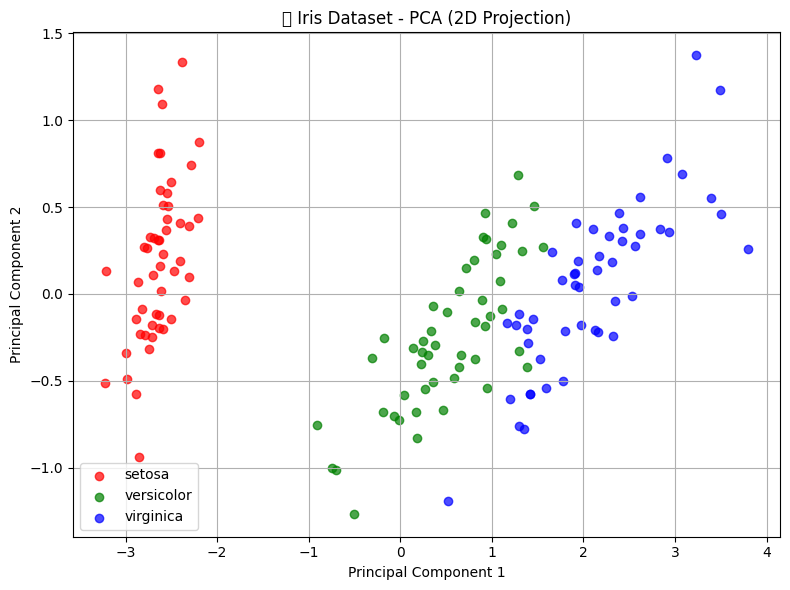

In [10]:
# --------------------------------------------
# Step 4: Visualize the reduced 2D data
# --------------------------------------------

# 🌈 Assign each class a color to distinguish in the scatter plot
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))  # Bigger canvas for clarity

# Loop through each class label (0, 1, 2)
for i, target_name in enumerate(target_names):
    # Plot only the rows (flowers) that belong to class i
    plt.scatter(
        X_reduced[y == i, 0],  # X-axis: principal component 1 (captures max variance)
        X_reduced[y == i, 1],  # Y-axis: principal component 2 (captures next most variance)
        alpha=0.7,             # Slight transparency to handle overlapping points
        color=colors[i],       # Color based on flower type
        label=target_name      # Label for legend
    )

# 📈 Add title, labels, legend, grid for better UX
plt.title("🌸 Iris Dataset - PCA (2D Projection)")
plt.xlabel("Principal Component 1")  # PC1 = direction of greatest variance in original data
plt.ylabel("Principal Component 2")  # PC2 = second greatest, orthogonal to PC1
plt.legend()                         # Show class names on plot
plt.grid(True)                       # Add grid lines
plt.tight_layout()                   # Optimize spacing
plt.show()

# 🧠 We're now seeing 4D data in 2D — but with most of the "important structure" preserved
# If PCA did a good job, you’ll see clusters forming that match the classes


In [ ]:
# --------------------------------------------
# Step 5: Inspect explained variance
# --------------------------------------------

# 🧠 Explained Variance:
# Each principal component (PC) captures a portion of the data's total variance (spread).
# The explained_variance_ratio tells us how much of the original information (variance) 
# is retained by the selected PCs.
#
# 📉 If this value is low (e.g., < 90%), it likely means:
#   - We've set n_components too low and discarded important information.
#   - The lower PCs (the ones we dropped) still carried meaningful variation.
#
# 🛠️ Fix: Increase n_components until the total retained variance is high enough for your use case.
#        You can also let PCA auto-select components like this:
#        `PCA(n_components=0.95)` → keeps as many PCs as needed to retain 95% variance.
#
# ❓ What if n_components == number of original features?
# ✅ Then PCA keeps *all* the variance (100%) and doesn't lose any info.
# ⚠️ But — no dimensionality reduction happens. You're just rotating the data axes.
#
# 🎯 Rule of thumb:
# Try to retain ≥ 95% variance for most ML/visualization tasks — it's a good trade-off
# between compression and preserving important data patterns.


# 🔍 explained_variance_ratio() tells us how much of the total data variance is captured by each PC
# For example: [0.72, 0.23] → PC1 explains 72%, PC2 explains 23%, so total = 95%
variance_ratio = pca.explained_variance_ratio()

# Total variance captured by first 2 PCs (should be close to 100% if most info retained)
total_retained = np.sum(variance_ratio)

# Output the per-component and total retained variance
print(f"📊 Explained Variance Ratio per Component: {variance_ratio}")
print(f"✅ Total Variance Retained: {total_retained:.2%}")  # Usually want this > 90%

# 💡 If this number is low, it means 2D projection may be hiding useful details


📊 Explained Variance Ratio per Component: [0.92461872 0.05306648]
✅ Total Variance Retained: 97.77%


In [12]:
# --------------------------------------------
# Optional: View the principal axes (components)
# --------------------------------------------

# components() gives us the direction vectors of each PC in terms of original features
# Each PC is a linear combination of the original features (like "windows + frames" in your example)
components = pca.components()

# Print the actual direction vectors for PC1 and PC2
# These show how each original feature contributes to each principal component
print("🧭 Principal Axes (first 2):")
print(components)

# 🔚 Summary:
# - Original data had 4 features → PCA found new "axes" (PCs)
# - Data is projected onto PC1 & PC2
# - These PCs are ranked by how much they explain the variance
# - You get a compressed version of the data with minimal info loss
# - PCA works best when features are correlated
# - You choose how many PCs to keep = dimensionality trade-off 🎯

🧭 Principal Axes (first 2):
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
